# Step 1. Data import & general screening

In [1]:
# importing the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the datafile as a dataframe using pandas
data = pd.read_csv('/Users/elissadejong/P1_FIFA_money_ball/instructions_and_data/data/fifa21_male2.csv')
# pd.set_option('max_column', None)
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [3]:
# checking the size of the dataframe
data.shape

(17125, 107)

In [4]:
# obtaining information about the different datatypes in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [5]:
# pd.set_option('max_row', None)
data.dtypes

ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

# Step 2.0. General cleaning of the data

In [6]:
# setting the index to the natural index 'ID' of the dataframe
data = data.set_index('ID')
data.head()

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [7]:
# making the headers standardized
cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))

data.columns = cols
data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [8]:
# rename column team_&_contract
data = data.rename(columns = {'team_&_contract': 'team_and_contract'})
data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [9]:
# split column 'contract' into 'contract_beginning' and 'contract_ending'
data[['contract_beginning','contract_ending']] = data.contract.str.split('~', expand=True)
data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,rwb,lb,lcb,cb,rcb,rb,gk,gender,contract_beginning,contract_ending
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,2009,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,2018,2021


In [10]:
data['contract_beginning'].value_counts()

2019                      4357
2020                      3882
2018                      2788
2017                      1736
2016                      1000
                          ... 
Olimpia Asunción 2020        1
Sydney FC 2017               1
Colo-Colo 2018               1
Czech Republic Free          1
Alianza Lima 2020            1
Name: contract_beginning, Length: 235, dtype: int64

In [11]:
# manually changing the values containing FC Basel 1893 and number-sequences longer than 4 followed by a space,
# so the right year can be extracted later using regexp
for i in data['contract_beginning']:
    if 'FC Basel 1893' in i:
        data['contract_beginning'] = data['contract_beginning'].str.replace('FC Basel 1893', '')
    elif '114912' in i:
        data['contract_beginning'] = data['contract_beginning'].str.replace('114912', '')
    elif '113974' in i: 
        data['contract_beginning'] = data['contract_beginning'].str.replace('113974', '')

In [12]:
data['contract_ending'].value_counts()

 2021    4847
 2022    3699
 2023    2811
 2020    1712
 2024    1580
 2025     433
 2019     257
 2018     126
 2017      93
 2016      80
 2015      60
 2014      46
 2013      29
 2012      26
 2011      20
 2026       4
 2028       1
 2027       1
Name: contract_ending, dtype: int64

In [13]:
data['contract_beginning'] = data['contract_beginning'].astype(str)

In [14]:
data['contract_beginning'] = data.contract_beginning.str.extract(r'(\d\d\d\d )')

In [15]:
data['contract_beginning'].value_counts()

2019     4449
2020     4116
2018     2836
2017     1758
2016     1012
2021      632
2015      623
2014      414
2013      273
2012      181
2011      138
2010       90
2009       52
2008       42
2007       28
2005       21
2006       13
2022       12
2003       11
2004        7
2002        6
1998        6
2001        3
1993        2
1999        2
2000        2
1990        1
2023        1
1995        1
1991        1
1996        1
1992        1
Name: contract_beginning, dtype: int64

In [16]:
data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,rwb,lb,lcb,cb,rcb,rb,gk,gender,contract_beginning,contract_ending
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,NaN,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,2018,2021


## Step 2.1. Conversion of datatypes of columns 'height', 'weight', 'value', 'wage' and 'release_clause' from object to numerical     

In [17]:
#HEIGHT
data['height'].dtypes

dtype('O')

In [18]:
data['height'] = data['height'].str.replace('"',"")
data['height'] = pd.to_numeric(data['height'].map(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54))

data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,rwb,lb,lcb,cb,rcb,rb,gk,gender,contract_beginning,contract_ending
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,NaN,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,2018,2021


In [19]:
#WEIGHT
data['weight'] = pd.to_numeric(data['weight'].map(lambda x: x.rstrip('lbs')))
#weight from lbs to kg
data['weight'] = data['weight'].div(2.205).round(2)

data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,rwb,lb,lcb,cb,rcb,rb,gk,gender,contract_beginning,contract_ending
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,NaN,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,2018,2021


In [20]:
#VALUE
data['value'] = data['value'].map(lambda x: x.lstrip('€'))

for i in data['value']:
    if 'K' in i:
        data['value'] = data['value'].str.replace('K', '000')
    elif 'M' in i:
        data['value'] = data['value'].str.replace('M', '00000')
        data['value'] = data['value'].str.replace('.', '')

data['value'] = pd.to_numeric(data['value'])

data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,rwb,lb,lcb,cb,rcb,rb,gk,gender,contract_beginning,contract_ending
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,NaN,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,2018,2021


In [21]:
#WAGE
data['wage'] = data['wage'].map(lambda x: x.lstrip('€'))

for i in data['wage']:
    if 'K' in i:
        data['wage'] = data['wage'].str.replace('K', '000')
    elif 'M' in i:
        data['wage'] = data['wage'].str.replace('M', '00000')
        data['wage'] = data['wage'].str.replace('.', '')

data['wage'] = pd.to_numeric(data['wage'])

data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,rwb,lb,lcb,cb,rcb,rb,gk,gender,contract_beginning,contract_ending
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,NaN,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,2018,2021


In [22]:
#RELEASE_CLAUSE
data['release_clause'] = data['release_clause'].map(lambda x: x.lstrip('€'))

for i in data['release_clause']:
    if 'K' in i:
        data['release_clause'] = data['release_clause'].str.replace('K', '000')
    elif 'M' in i:
        data['release_clause'] = data['release_clause'].str.replace('M', '00000')
        data['release_clause'] = data['release_clause'].str.replace('.', '')

data['release_clause'] = pd.to_numeric(data['release_clause'])

data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,rwb,lb,lcb,cb,rcb,rb,gk,gender,contract_beginning,contract_ending
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,NaN,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,2018,2021


## Step 2.2. Conversion of datatype of column 'joined' from object to date

In [23]:
data['joined'].dtypes

dtype('O')

In [24]:
#joined
if (isinstance(data['joined'], str)):
    for i in data['joined']:
        data['joined'] = data['joined'].str.replace('( [0-9],)', '0([0-9])')
else:
    data['joined'] = data['joined']

data['joined'] = pd.to_datetime(data['joined'], format="%b %d, %Y")

data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,rwb,lb,lcb,cb,rcb,rb,gk,gender,contract_beginning,contract_ending
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,NaN,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,2018,2021


In [25]:
# checking and dealing with NaN values 
# pd.set_option('max_row', None)
data.isna().sum()/len(data)*100

name                  0.000000
age                   0.000000
ova                   0.000000
nationality           0.000000
club                  0.134307
                        ...   
rb                    0.000000
gk                    0.000000
gender                0.000000
contract_beginning    2.277372
contract_ending       7.591241
Length: 108, dtype: float64

In [26]:
# dropping columns with more than 75% of NaN values
data1 = data.loc[:, data.isnull().sum() < 0.75*data.shape[0]]
data1.shape

(17125, 107)

In [27]:
data1.dtypes

name                  object
age                    int64
ova                    int64
nationality           object
club                  object
                       ...  
rb                    object
gk                    object
gender                object
contract_beginning    object
contract_ending       object
Length: 107, dtype: object

In [28]:
# checking for duplicate rows and dropping if there are any
data1.duplicated().any()

False

# Step 3. Getting the data into SQL & setting up a connection between SQL and Python

In [29]:
data1.to_csv(r'/Users/elissadejong/P1_FIFA_money_ball/fifa21_male2_sql.csv')

In [30]:
import pymysql
from sqlalchemy import create_engine
import getpass  # to get the password without showing the input
password = getpass.getpass()

········


In [31]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/P1_FIFA_money_ball'

engine = create_engine(connection_string)

# Step 4. Questions 
## Question 1: How do the top 10 ranked club squads in FIFA21 differ in their footballers' mentalities?

In [32]:
# #https://www.fifplay.com/fifa-21-best-clubs/
# 1 FC Barcelona
# 2 Piemonte Calcio (Juventus)
# 3 Real Madrid
# 4 Manchester City
# 5 Liverpool
# 6 Paris Saint-Germain
# 7 FC Bayern München
# 8 Tottenham Hotspur
# 9 Borussia Dortmund
# 10 Atlético Madrid

In [33]:
# checking for multiple values per club and the spelling of the club's name in the data
data1['club'].value_counts()

Manchester United           45
Bolton Wanderers            45
Chelsea                     45
AS Monaco                   43
Arsenal                     43
                            ..
Dinamo Moscow                1
CD Trofense                  1
Osmanlıspor                  1
FC Istres Ouest Provence     1
Amkar Perm                   1
Name: club, Length: 917, dtype: int64

In [34]:
# making a copy of the original table including only the top 10 ranked club squads in FIFA21

top_10_ranked = '''
CREATE TABLE top_10_ranked AS
    SELECT *
    FROM fifa21_male2_sql
    WHERE club = 'FC Barcelona'
    OR club = 'Juventus'
    OR club = 'Real Madrid'
    OR club = 'Manchester City'
    OR club = 'Liverpool'
    OR club = 'Paris Saint-Germain'
    OR club = 'FC Bayern München'
    OR club = 'Tottenham Hotspur'
    OR club = 'Borussia Dortmund'
    OR club = 'Atlético Madrid';
    '''

engine.execute("DROP TABLE IF EXISTS top_10_ranked")
engine.execute(top_10_ranked)

In [35]:
# viewing the size of the number of footballers representing each club
query_footballers = '''
SELECT club, COUNT(*)
FROM top_10_ranked
GROUP BY club;
'''

data_footballers_per_club = pd.read_sql_query(query_footballers, engine)
data_footballers_per_club

,club,COUNT(*)
0,FC Bayern München,25
1,Juventus,40
2,Manchester City,38
3,FC Barcelona,37
4,Paris Saint-Germain,33
5,Borussia Dortmund,32
6,Liverpool,39
7,Real Madrid,30
8,Tottenham Hotspur,39
9,Atlético Madrid,39


In [36]:
query_avg_mentalities = '''
SELECT club, ROUND(AVG(mentality), 2) as avg_mentalities, 
DENSE_RANK() OVER(ORDER BY ROUND(AVG(mentality), 2) DESC) AS 'RANK_mentalities'
FROM top_10_ranked
GROUP BY club;
'''

data_mentalities = pd.read_sql_query(query_avg_mentalities, engine)
data_mentalities.head()

,club,avg_mentalities,RANK_mentalities
0,Juventus,307.60,1
1,FC Bayern München,307.20,2
2,Manchester City,303.66,3
3,Real Madrid,302.30,4
4,Liverpool,299.44,5


In [37]:
query_avg_aggression = '''
SELECT club, ROUND(AVG(aggression), 2) as avg_aggression, 
DENSE_RANK() OVER(ORDER BY ROUND(AVG(aggression), 2) DESC) AS 'RANK_aggression'
FROM top_10_ranked
GROUP BY club;
'''

data_aggression = pd.read_sql_query(query_avg_aggression, engine)
data_aggression.head()

,club,avg_aggression,RANK_aggression
0,Juventus,67.23,1
1,FC Bayern München,66.64,2
2,Atlético Madrid,65.54,3
3,Tottenham Hotspur,65.00,4
4,Liverpool,63.90,5


In [38]:
query_avg_interceptions = '''
SELECT club, ROUND(AVG(interceptions), 2) as avg_interceptions, 
DENSE_RANK() OVER(ORDER BY ROUND(AVG(interceptions), 2) DESC) AS 'RANK_interceptions'
FROM top_10_ranked
GROUP BY club;
'''

data_interceptions = pd.read_sql_query(query_avg_interceptions, engine)
data_interceptions.head()

,club,avg_interceptions,RANK_interceptions
0,FC Bayern München,61.32,1
1,Juventus,61.10,2
2,Paris Saint-Germain,57.82,3
3,Manchester City,57.68,4
4,Tottenham Hotspur,56.74,5


In [39]:
query_avg_positioning = '''
SELECT club, ROUND(AVG(positioning), 2) as avg_positioning, 
DENSE_RANK() OVER(ORDER BY ROUND(AVG(positioning), 2) DESC) AS 'RANK_positioning'
FROM top_10_ranked
GROUP BY club;
'''

data_positioning = pd.read_sql_query(query_avg_positioning, engine)
data_positioning.head()

,club,avg_positioning,RANK_positioning
0,Real Madrid,63.60,1
1,Manchester City,62.00,2
2,Atlético Madrid,60.44,3
3,FC Barcelona,60.05,4
4,FC Bayern München,59.24,5


In [40]:
query_avg_vision = '''
SELECT club, ROUND(AVG(vision), 2) as avg_vision, 
DENSE_RANK() OVER(ORDER BY ROUND(AVG(vision), 2) DESC) AS 'RANK_vision'
FROM top_10_ranked
GROUP BY club;
'''

data_vision = pd.read_sql_query(query_avg_vision, engine)
data_vision.head()

,club,avg_vision,RANK_vision
0,Real Madrid,67.57,1
1,FC Bayern München,66.40,2
2,Manchester City,66.16,3
3,Paris Saint-Germain,66.12,4
4,FC Barcelona,65.14,5


In [41]:
query_avg_penalties = '''
SELECT club, ROUND(AVG(penalties), 2) as avg_penalties, 
DENSE_RANK() OVER(ORDER BY ROUND(AVG(penalties), 2) DESC) AS 'RANK_penalties'
FROM top_10_ranked
GROUP BY club;
'''

data_penalties = pd.read_sql_query(query_avg_penalties, engine)
data_penalties.head()

,club,avg_penalties,RANK_penalties
0,Juventus,58.48,1
1,Real Madrid,57.90,2
2,FC Barcelona,56.73,3
3,Liverpool,55.87,4
4,Manchester City,55.45,5


In [42]:
query_avg_composure = '''
SELECT club, ROUND(AVG(composure), 2) as avg_composure, 
DENSE_RANK() OVER(ORDER BY ROUND(AVG(composure), 2) DESC) AS 'RANK_composure'
FROM top_10_ranked
GROUP BY club;
'''

data_composure = pd.read_sql_query(query_avg_composure, engine)
data_composure.head()

,club,avg_composure,RANK_composure
0,Real Madrid,72.37,1
1,Liverpool,69.10,2
2,Atlético Madrid,69.03,3
3,Paris Saint-Germain,68.61,4
4,Juventus,68.50,5


In [43]:
# merging the queries into a dataframe for an overview of the results
data_merged = pd.merge(data_mentalities, data_aggression, on='club')

In [44]:
data_merged = pd.merge(data_merged, data_interceptions, on='club')

In [45]:
data_merged = pd.merge(data_merged, data_positioning, on='club')

In [46]:
data_merged = pd.merge(data_merged, data_vision, on='club')

In [47]:
data_merged = pd.merge(data_merged, data_penalties, on='club')

In [48]:
data_merged = pd.merge(data_merged, data_composure, on='club')
data_merged

,club,avg_mentalities,RANK_mentalities,avg_aggression,RANK_aggression,avg_interceptions,RANK_interceptions,avg_positioning,RANK_positioning,avg_vision,RANK_vision,avg_penalties,RANK_penalties,avg_composure,RANK_composure
0,Juventus,307.60,1,67.23,1,61.10,2,59.20,6,61.60,9,58.48,1,68.50,5
1,FC Bayern München,307.20,2,66.64,2,61.32,1,59.24,5,66.40,2,53.60,7,67.88,6
2,Manchester City,303.66,3,62.37,7,57.68,4,62.00,2,66.16,3,55.45,5,66.00,7
3,Real Madrid,302.30,4,60.70,8,52.53,10,63.60,1,67.57,1,57.90,2,72.37,1
4,Liverpool,299.44,5,63.90,5,56.56,6,58.08,8,65.03,6,55.87,4,69.10,2
5,Paris Saint-Germain,298.76,6,62.58,6,57.82,3,58.82,7,66.12,4,53.42,8,68.61,4
6,Atlético Madrid,297.08,7,65.54,3,54.59,8,60.44,3,62.26,8,54.26,6,69.03,3
7,FC Barcelona,295.03,8,59.49,9,53.62,9,60.05,4,65.14,5,56.73,3,63.51,10
8,Tottenham Hotspur,287.49,9,65.00,4,56.74,5,52.23,10,60.64,10,52.87,9,65.10,8
9,Borussia Dortmund,281.66,10,58.63,10,56.28,7,53.66,9,63.09,7,50.00,10,64.78,9


## Question 2: Does the time since a footballer joined the team influence their overall rating with respect to their potential?

In [49]:
# since FIFA21 also includes retired footballers (with a contract that has ended before 2021),
# the data for this question will include only the footballers with contracts still running in 2021

In [50]:
# replacing NaN-values and converting the split contract columns into numerical variables
data1['contract_beginning'] = data1['contract_beginning'].fillna(0)
data1['contract_ending'] = data1['contract_ending'].fillna(0)

data1['contract_beginning'] = data1['contract_beginning'].astype(int)
data1['contract_ending'] = data1['contract_ending'].astype(int)

In [51]:
# making a new column representing the duration in years/seasons since a footballer joined the team
duration = []

contract_beginning = data1['contract_beginning']
contract_ending = data1['contract_ending']

for e, b in zip(contract_ending, contract_beginning):    
    if (e >= 2021) & (b < 2021):
        d = (2021 - b)
        duration.append(d)
    elif (e >= 2021) & (b == 2021):
        d = 0
        duration.append(d)
    elif b > 2021:
        duration.append('not yet in')
    else:
        duration.append('retired or null')

data1['duration'] = duration
data1['duration'].value_counts()

2                  3971
retired or null    3736
1                  3638
3                  2386
4                  1386
5                   786
6                   437
7                   284
8                   161
9                   103
10                   80
11                   51
12                   28
13                   25
14                   13
not yet in           13
16                    7
15                    6
18                    5
17                    4
19                    3
20                    1
23                    1
Name: duration, dtype: int64

In [52]:
# making a new column that represents the difference between the footballer's Overall Rating in FIFA21 and the
# footballer's Potential

data1['diff'] = data1['pot'] - data1['ova']
data1['diff'].value_counts()

 0     5741
 1     1002
 3      976
 5      874
 7      836
 9      784
 6      772
 8      733
 10     623
 11     598
 4      587
 2      559
 14     497
 12     481
 13     436
 15     409
 16     298
 17     279
 18     190
 20     186
 19     126
 21      46
 22      40
 23      27
 24      13
 25       8
 26       3
-1        1
Name: diff, dtype: int64

In [53]:
# making a new dataframe where duration = 0, 'not yet in' and 'retired or null' are filtered out, 
# in order to get the appropriate results

data1_question2 = data1.drop(data1[(data1['duration'] == 0) | (data1['duration'] == 'not yet in') | (data1['duration'] == 'retired or null')].index)

In [54]:
# using a groupby function to see the differences between OVA and POT with respect to the duration 

grouped_duration = data1_question2.groupby('duration').agg({'diff': ['mean', 'min', 'max']})
grouped_duration.columns = ['diff_mean', 'diff_min', 'diff_max']
grouped_duration = grouped_duration.reset_index()
grouped_duration

,duration,diff_mean,diff_min,diff_max
0,1,6.246564,0,26
1,2,6.149081,0,25
2,3,6.423303,0,24
3,4,5.561328,0,20
4,5,5.155216,0,20
5,6,4.050343,0,14
6,7,3.095070,0,13
7,8,3.031056,0,12
8,9,1.592233,0,10
9,10,0.725000,0,9


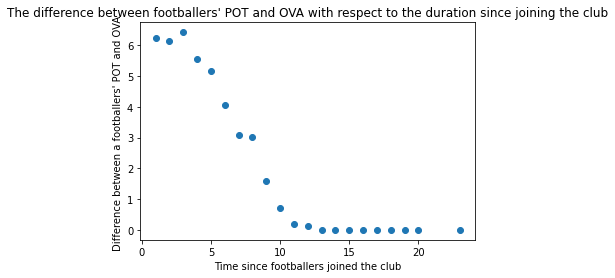

In [55]:
# making a plot for better visualization
x = grouped_duration['duration']
y = grouped_duration['diff_mean']

plt.scatter(x, y)
plt.title("The difference between footballers' POT and OVA with respect to the duration since joining the club")
plt.xlabel("Time since footballers joined the club")
plt.ylabel("Difference between a footballers' POT and OVA ")
plt.show()

In [56]:
# checking the Pearson correlation between duration and the differences between OVA and POT
x.corr(y)

-0.8924588891436988

## Question 3: Do footballers with a left foot preference have a better wrong foot rating than their right footed colleagues?

In [57]:
data1['foot'].value_counts()

Right    12906
Left      4219
Name: foot, dtype: int64

In [58]:
data1['w/f'].value_counts()

3 ★    10567
2 ★     3384
4 ★     2777
5 ★      290
1 ★      107
Name: w/f, dtype: int64

In [59]:
# to get proper results, the total occurences of lefties need to be levelled with the total occurences 
# of right-foot-preferred footballers. For that, the values of count are normalized through the following: 

In [60]:
# new dataframe with only the two columns used for this question, so a groupby/size-combination function is possible
data1_question3 = data1[['foot', 'w/f']]

In [61]:
grouped_wf = data1_question3.groupby(['w/f', 'foot']).size().reset_index(name='count')
# normalize the 'count' values
x = data1_question3['foot'].value_counts()
grouped_wf['count'] = grouped_wf['count'].div(grouped_wf['foot'].map(x))
grouped_wf

,w/f,foot,count
0,1 ★,Left,0.005689
1,1 ★,Right,0.006431
2,2 ★,Left,0.268784
3,2 ★,Right,0.174338
4,3 ★,Left,0.597298
5,3 ★,Right,0.623508
6,4 ★,Left,0.113060
7,4 ★,Right,0.178212
8,5 ★,Left,0.015169
9,5 ★,Right,0.017511


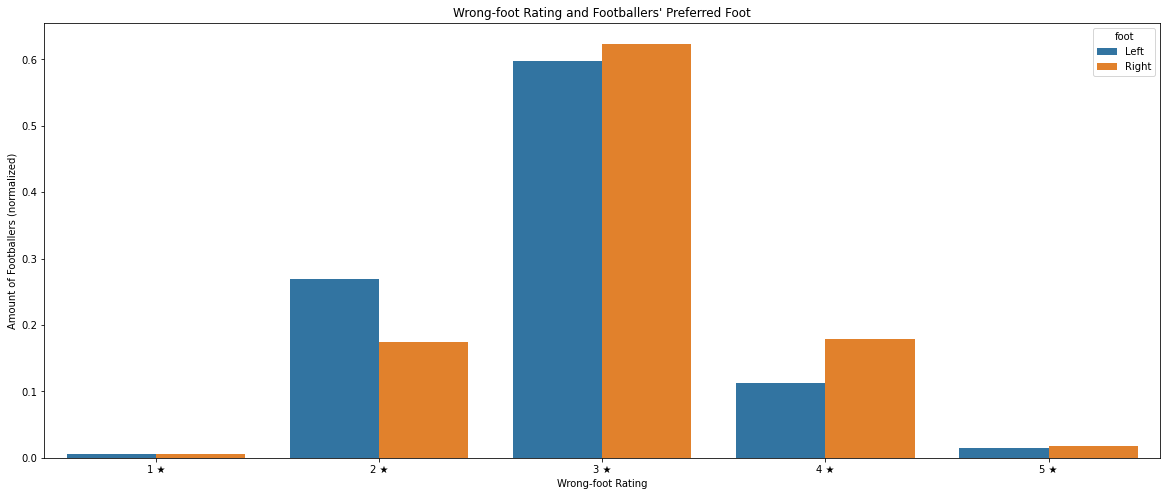

In [62]:
# making a barplot for visualization

plt.figure(figsize=(20,8))
sns.barplot(x = 'w/f', y = 'count', hue='foot', data=grouped_wf)
plt.title("Wrong-foot Rating and Footballers' Preferred Foot")
plt.xlabel("Wrong-foot Rating")
plt.ylabel("Amount of Footballers (normalized)")
plt.show()

# Step 5. Linear Regression
## TIME = MONEY: When should a footballer be transferred? Making a model to realize when a footballer's market value is optimal for a transfer

## Variable Selection

In [63]:
# continuing with dataframe 'data1'

# converting 'duration' into a numerical variable

data1['duration'] = data1['duration'].astype(str)

In [64]:
for i in data1['duration']:
    if 'retired or null' in i:
        data1['duration'] = data1['duration'].str.replace('retired or null', '0')
    elif 'not yet in' in i:
        data1['duration'] = data1['duration'].str.replace('not yet in', '0')


In [65]:
data1['duration'] = data1['duration'].fillna('0')

In [66]:
data1['duration'] = pd.to_numeric(data1['duration'])

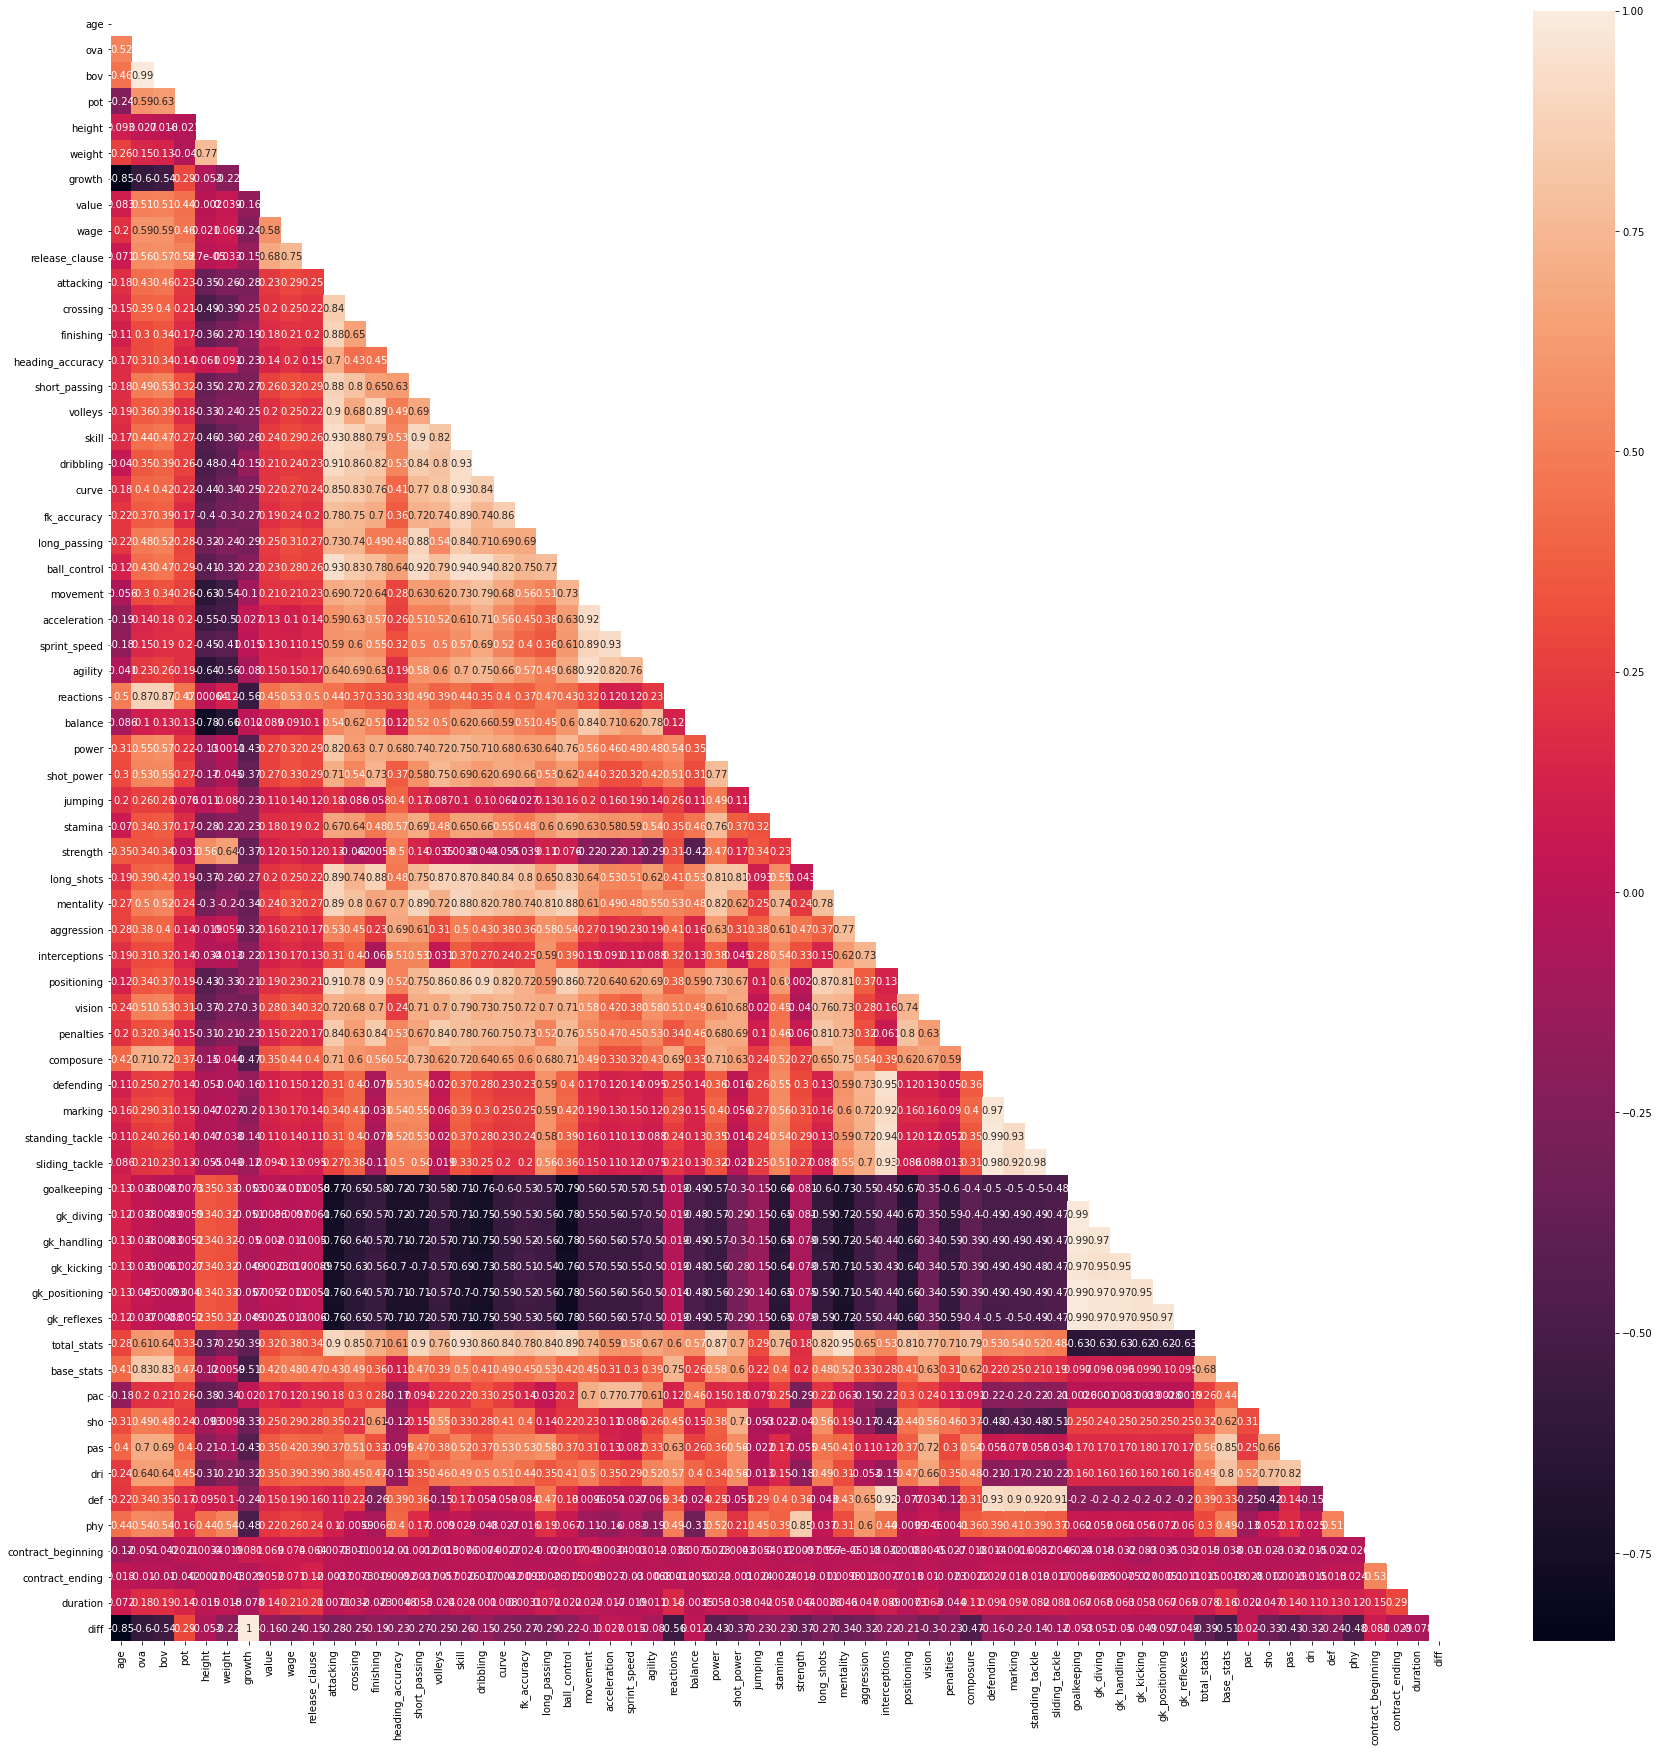

In [67]:
# checking the correlations to grasp which variables can be excluded from the model dataframe 

mask = np.zeros_like(data1.corr())
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(30, 30))
ax = sns.heatmap(data1.corr(), mask=mask, annot=True)
plt.show()

In [68]:
# initial variable selection based on the correlation matrix and "common sense"
# growth is dropped due to strong correlation with age
# the other variables are dropped by "common sense" to try out at an initial model to determine market value (target) 
data_model = data1[['age', 'ova', 'bov', 'pot', 'weight', 'wage', 'release_clause', 'mentality', 'duration', 'foot', 'w/f', 'ir', 'value']]
data_model.head()

# after getting an initial model with R2 = 0.636, the variables 'goalkeeping', 'height' and 'bp' were also dropped

,age,ova,bov,pot,weight,wage,release_clause,mentality,duration,foot,w/f,ir,value
ID,,,,,,,,,,,,,
2,33,69,71,69,82.09,7000,0,320,0,Left,3 ★,2 ★,625000
16,37,71,70,71,64.85,7000,1100000,362,0,Right,4 ★,1 ★,600000
27,33,71,71,71,73.02,15000,0,317,0,Right,4 ★,2 ★,1100000
36,36,68,70,82,74.83,0,0,271,0,Right,3 ★,1 ★,0
41,36,81,82,81,68.03,12000,7200000,370,3,Right,4 ★,4 ★,5500000


In [69]:
data_model.dtypes

age                 int64
ova                 int64
bov                 int64
pot                 int64
weight            float64
wage                int64
release_clause      int64
mentality           int64
duration            int64
foot               object
w/f                object
ir                 object
value               int64
dtype: object

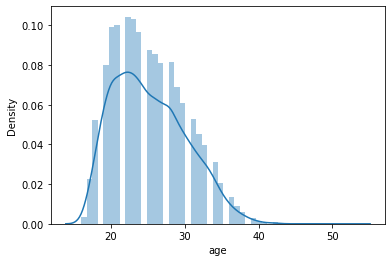

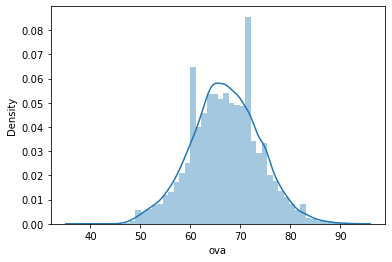

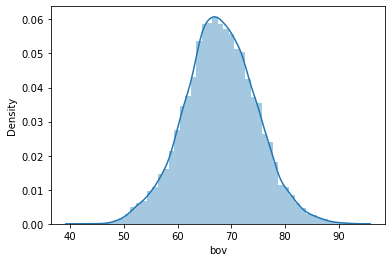

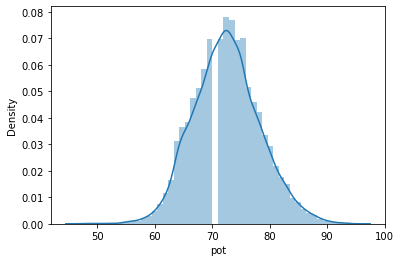

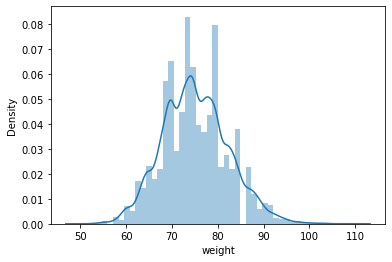

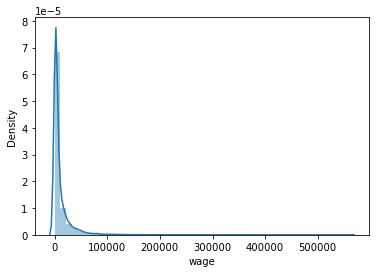

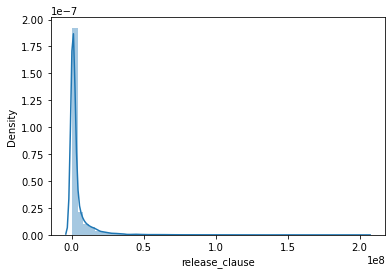

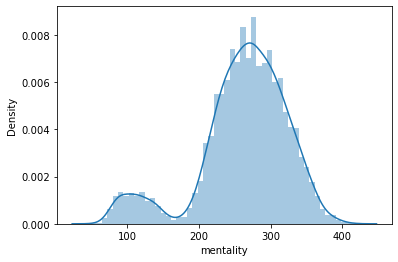

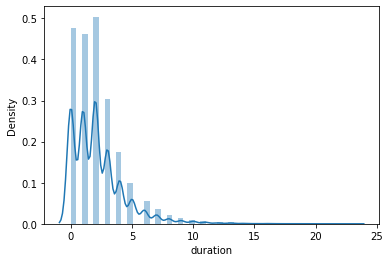

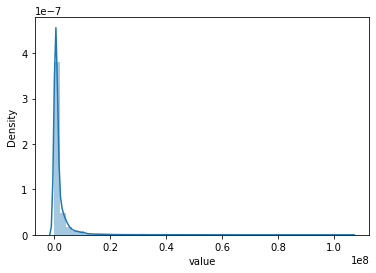

In [70]:
#EDA
for column in data_model.select_dtypes(np.number).columns:
    sns.distplot(data_model[column])
    plt.show()

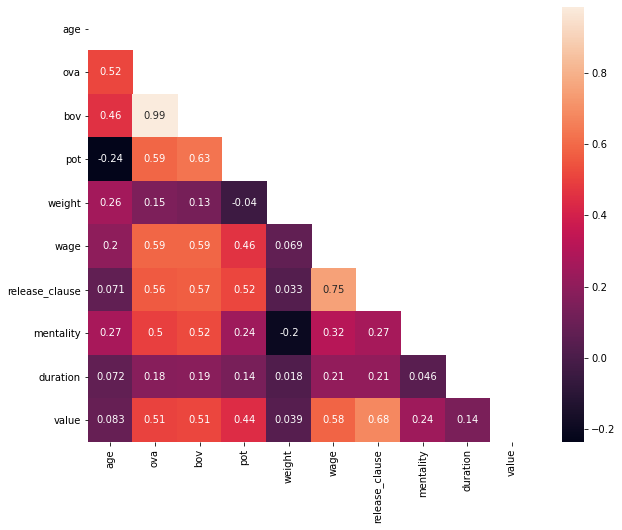

In [71]:
#check the correlations of the data_model
mask = np.zeros_like(data_model.corr())

mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data_model.corr(), mask=mask, annot=True)
plt.show()

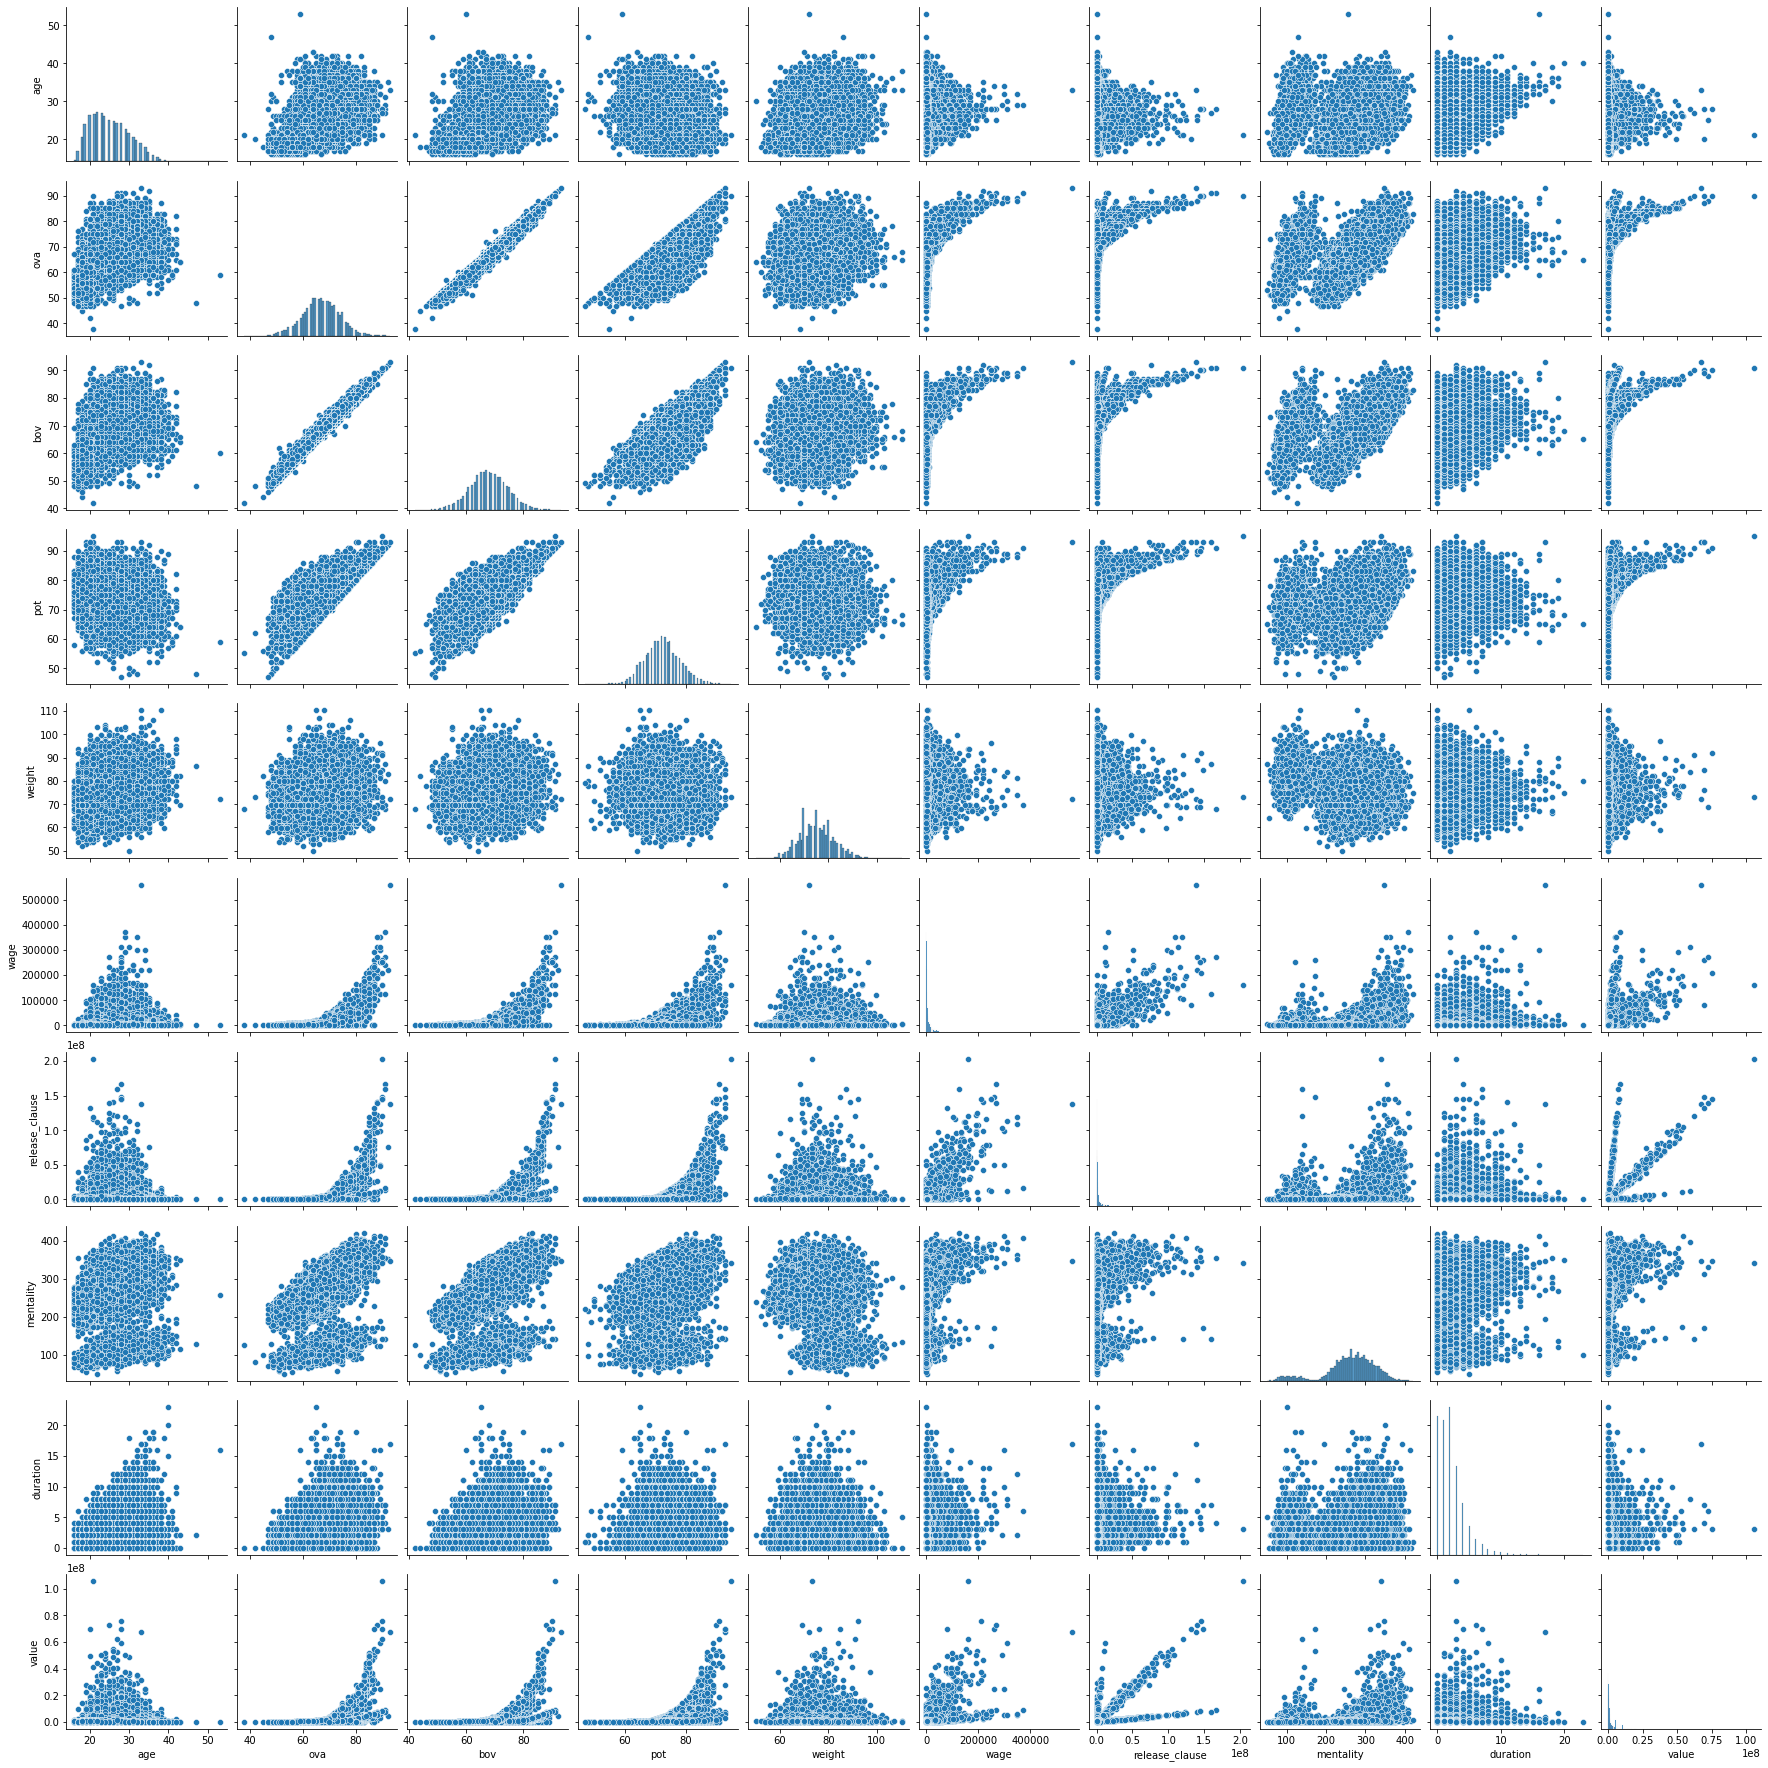

In [72]:
# covariance visualization
sns.pairplot(data_model)

In [73]:
# generate a new dataframe containing only numerical variables 

numerical_model = pd.DataFrame(data_model.select_dtypes('number'))
numerical_model.describe()

,age,ova,bov,pot,weight,wage,release_clause,mentality,duration,value
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,17125.000000,1.712500e+04
mean,25.272934,66.965022,67.900204,72.489810,75.128587,10532.928467,4.111806e+06,261.922803,2.201518,1.743266e+06
std,4.942665,6.864329,6.637538,5.769949,7.174038,21145.376646,9.736019e+06,62.913935,2.175219,3.795473e+06
min,16.000000,38.000000,42.000000,47.000000,49.890000,0.000000,0.000000e+00,50.000000,0.000000,0.000000e+00
25%,21.000000,62.000000,64.000000,69.000000,69.840000,1000.000000,4.130000e+05,235.000000,1.000000,3.250000e+05
50%,25.000000,67.000000,68.000000,72.000000,74.830000,3000.000000,1.100000e+06,269.000000,2.000000,6.750000e+05
75%,29.000000,72.000000,72.000000,76.000000,79.820000,11000.000000,3.200000e+06,304.000000,3.000000,1.500000e+06
max,53.000000,93.000000,93.000000,95.000000,110.200000,560000.000000,2.031000e+08,421.000000,23.000000,1.055000e+08


In [74]:
# dealing with NaN values in the numerical data

def fill_missing_n(data, cols):
        for col in cols:
            mean_val = data[col].mean()
            data[col] = data[col].fillna(mean_val)
        return data

numerical_model = fill_missing_n(numerical_model, numerical_model.columns)

In [75]:
# BoxCox using a function (normalizing numerical variables)

def boxcox_transform(numerical_model):
    numeric_cols = numerical_model.columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        numerical_model[column] = np.where(numerical_model[column]<=0, np.NAN, numerical_model[column]) 
        numerical_model[column] = numerical_model[column].fillna(numerical_model[column].mean())
        transformed_data, ci = stats.boxcox(numerical_model[column])
        numerical_model[column] = transformed_data
        _ci[column] = [ci] 
    return numerical_model, _ci

In [76]:
numerical_model, _ci = boxcox_transform(numerical_model)

In [77]:
numerical_model.describe()

,age,ova,bov,pot,weight,wage,release_clause,mentality,duration,value
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,2.207722,57.146224,54.355919,13.514610,5.398991,5.951492,11.000470,48535.275285,0.839503,9.393170
std,0.086794,5.704736,5.075886,0.578035,0.147017,0.675570,0.787011,20279.370136,0.543476,0.556539
min,2.001773,32.818113,34.289416,10.676379,4.786849,4.417208,7.255188,1515.791635,0.000000,5.697353
25%,2.133497,53.026877,51.384464,13.172802,5.293156,5.616544,10.458809,36553.696214,0.679594,9.034375
50%,2.213375,57.188234,54.448073,13.477825,5.399156,5.971940,10.972442,48263.214791,1.006131,9.375843
75%,2.278689,61.335916,57.500225,13.874088,5.498977,6.454826,11.566394,62066.936966,1.064826,9.780418
max,2.520535,78.627034,73.360065,15.618603,6.007481,7.985427,13.512571,121245.679079,2.870555,11.363226


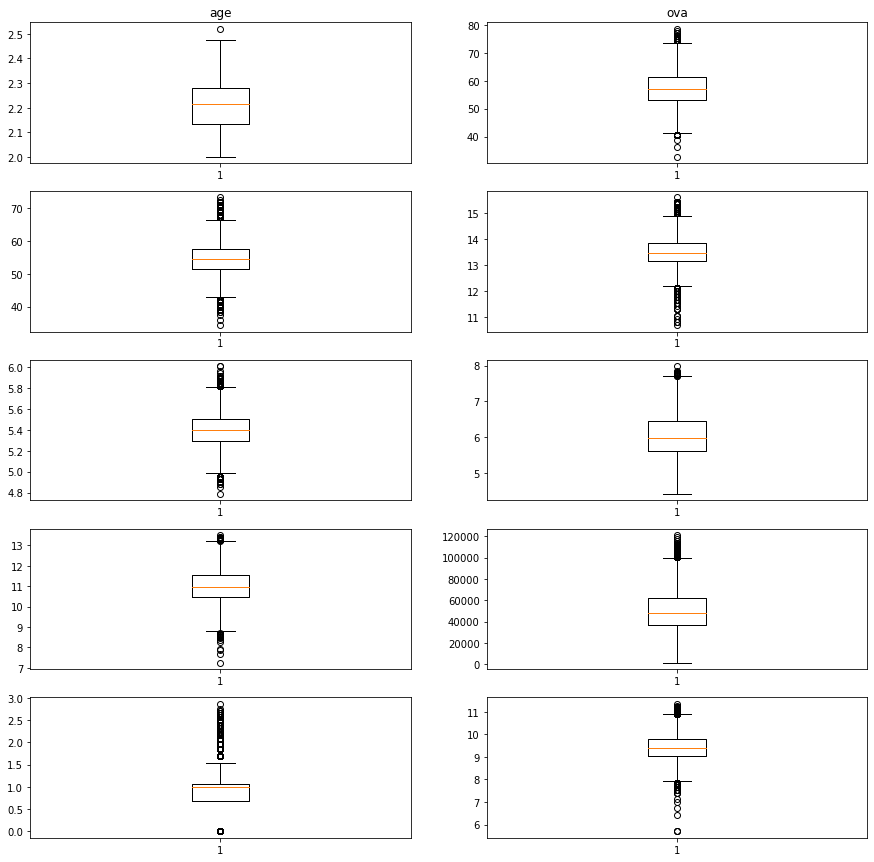

In [78]:
# boxplots for visualizing outliers among the numerical variables

cols = numerical_model.columns

fig, axs = plt.subplots(5, 2, figsize=(15,15))
for ax, col in zip(axs[0], cols):
    ax.set_title(col)

axs[0, 0].boxplot(x=numerical_model['age'])
axs[0, 1].boxplot(x=numerical_model['ova'])
axs[1, 0].boxplot(x=numerical_model['bov'])
axs[1, 1].boxplot(x=numerical_model['pot'])
axs[2, 0].boxplot(x=numerical_model['weight'])
axs[2, 1].boxplot(x=numerical_model['wage'])
axs[3, 0].boxplot(x=numerical_model['release_clause'])
axs[3, 1].boxplot(x=numerical_model['mentality'])
axs[4, 0].boxplot(x=numerical_model['duration'])
axs[4, 1].boxplot(x=numerical_model['value'])

plt.show()

In [79]:
# checking and dealing with outliers in numerical variables

# removing outliers using a function

def remove_outliers(numerical_model, threshold=1.5, in_columns=numerical_model.columns, skip_columns=[]):
    for column in in_columns:
        upper = np.percentile(numerical_model[column],75)
        lower = np.percentile(numerical_model[column],25)
        iqr = upper - lower
        upper_limit = upper + (threshold * iqr)
        lower_limit = lower - (threshold * iqr)
        numerical_model = numerical_model[(numerical_model[column]>lower_limit) & (numerical_model[column]<upper_limit)]
    return numerical_model

In [80]:
numerical_model = remove_outliers(numerical_model, threshold=1.5, in_columns=numerical_model.columns, skip_columns=[]) 


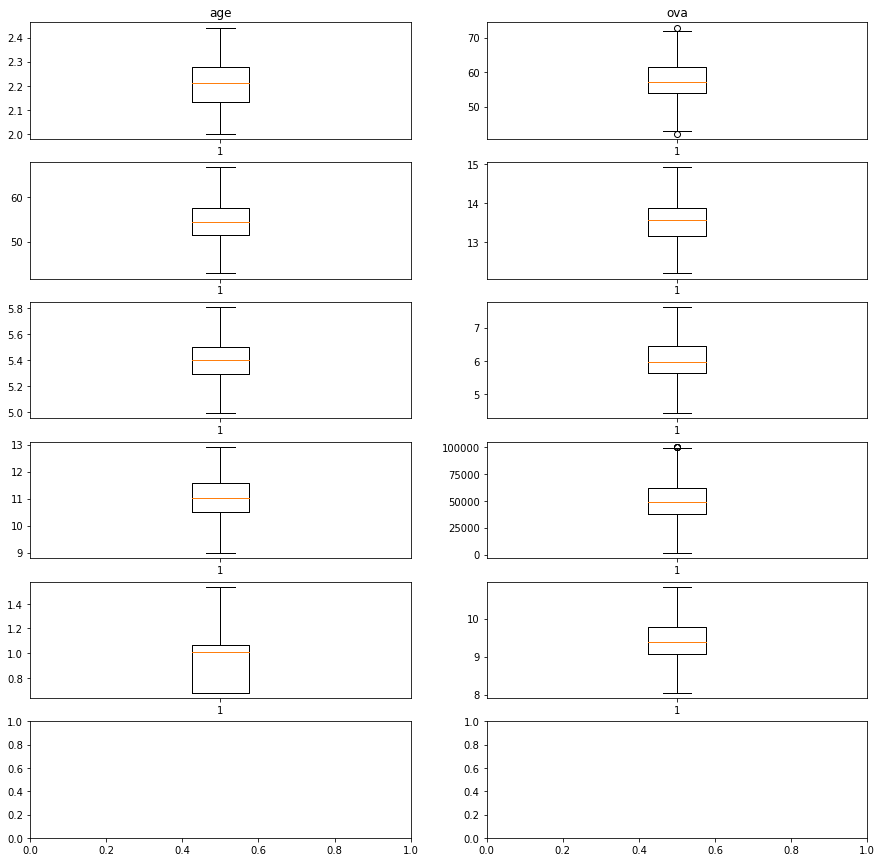

In [81]:
# boxplots for checking removal of outliers

cols = numerical_model.columns

fig, axs = plt.subplots(5, 2, figsize=(15,15))
for ax, col in zip(axs[0], cols):
    ax.set_title(col)

axs[0, 0].boxplot(x=numerical_model['age'])
axs[0, 1].boxplot(x=numerical_model['ova'])
axs[1, 0].boxplot(x=numerical_model['bov'])
axs[1, 1].boxplot(x=numerical_model['pot'])
axs[2, 0].boxplot(x=numerical_model['weight'])
axs[2, 1].boxplot(x=numerical_model['wage'])
axs[3, 0].boxplot(x=numerical_model['release_clause'])
axs[3, 1].boxplot(x=numerical_model['mentality'])
axs[4, 0].boxplot(x=numerical_model['duration'])
axs[4, 1].boxplot(x=numerical_model['value'])

plt.show()

In [82]:
# generate a new dataframe containing only categorical variables 

categorical_model = pd.DataFrame(data_model.select_dtypes(np.object))
categorical_model.describe()

,foot,w/f,ir
count,17125,17125,17125
unique,2,5,5
top,Right,3 ★,1 ★
freq,12906,10567,15136


In [83]:
# checking if standardizing values of the categorical variables is needed 

for col in categorical_model:
    print(categorical_model[col].unique())


['Left' 'Right']
['3 ★' '4 ★' '2 ★' '1 ★' '5 ★']
['2 ★' '1 ★' '4 ★' '3 ★' '5 ★']


In [84]:
# dealing with NaN values in the categorical data

def fill_missing_c(data, cols):
        for col in cols:
            mode_val = data[col].mode()
            data[col] = data[col].fillna(mode_val)
        return data

categorical_model = fill_missing_c(categorical_model, categorical_model.columns)

In [85]:
# Now encoding the categorical variables

categorical_model = pd.get_dummies(categorical_model, drop_first=True) 

In [86]:
# ValueError: Input contains NaN, infinity or a value too large for dtype('float64')
# FIXING THIS ERROR

In [87]:
# checking for existence of infinite values in the dataframe

count = np.isinf(numerical_model).values.sum()
count

0

In [88]:
# checking for existence of infinite values in the dataframe

count = np.isinf(categorical_model).values.sum()
count

0

In [89]:
numerical_model.head()

,age,ova,bov,pot,weight,wage,release_clause,mentality,duration,value
ID,,,,,,,,,,
2,2.333615,58.848889,56.738223,13.172802,5.542540,6.244139,11.566394,68971.821546,1.006131,9.307409
16,2.380795,60.507424,55.975537,13.376923,5.180109,6.244139,10.755372,88882.191075,1.006131,9.288483
27,2.333615,60.507424,56.738223,13.376923,5.361464,6.594838,11.566394,67648.651696,1.006131,9.564963
36,2.369619,58.018831,55.975537,14.448024,5.399156,6.446415,11.566394,49004.057770,1.006131,9.780418
41,2.369619,68.770363,65.084741,14.353973,5.253017,6.494475,11.812781,92968.831341,1.064826,10.253846


In [90]:
categorical_model.head()

,foot_Right,w/f_2 ★,w/f_3 ★,w/f_4 ★,w/f_5 ★,ir_2 ★,ir_3 ★,ir_4 ★,ir_5 ★
ID,,,,,,,,,
2,0,0,1,0,0,1,0,0,0
16,1,0,0,1,0,0,0,0,0
27,1,0,0,1,0,1,0,0,0
36,1,0,1,0,0,0,0,0,0
41,1,0,0,1,0,0,0,1,0


In [91]:
# SOLVED THE ERROR FINALLY: the two dataframes had to be merged on the indices to avoid generating NaN values 

df = pd.merge(numerical_model, categorical_model, left_index=True, right_index=True)
df

,age,ova,bov,pot,weight,wage,release_clause,mentality,duration,value,foot_Right,w/f_2 ★,w/f_3 ★,w/f_4 ★,w/f_5 ★,ir_2 ★,ir_3 ★,ir_4 ★,ir_5 ★
ID,,,,,,,,,,,,,,,,,,,
2,2.333615,58.848889,56.738223,13.172802,5.542540,6.244139,11.566394,68971.821546,1.006131,9.307409,0,0,1,0,0,1,0,0,0
16,2.380795,60.507424,55.975537,13.376923,5.180109,6.244139,10.755372,88882.191075,1.006131,9.288483,1,0,0,1,0,0,0,0,0
27,2.333615,60.507424,56.738223,13.376923,5.361464,6.594838,11.566394,67648.651696,1.006131,9.564963,1,0,0,1,0,1,0,0,0
36,2.369619,58.018831,55.975537,14.448024,5.399156,6.446415,11.566394,49004.057770,1.006131,9.780418,1,0,1,0,0,0,0,0,0
41,2.369619,68.770363,65.084741,14.353973,5.253017,6.494475,11.812781,92968.831341,1.064826,10.253846,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259064,2.086052,49.687176,47.537666,13.677395,5.180109,5.239823,10.367861,25966.918504,1.064826,8.918096,1,0,1,0,0,0,0,0,0
259068,2.086052,53.860296,52.151480,13.577977,5.498977,5.239823,10.666483,49750.699650,0.679594,9.226265,1,0,1,0,0,0,0,0,0
259070,2.059924,53.860296,52.151480,13.874088,5.399156,5.113799,10.895445,59163.577203,0.679594,9.325550,1,0,1,0,0,0,0,0,0


In [92]:
df.isna().sum()

age               0
ova               0
bov               0
pot               0
weight            0
wage              0
release_clause    0
mentality         0
duration          0
value             0
foot_Right        0
w/f_2 ★           0
w/f_3 ★           0
w/f_4 ★           0
w/f_5 ★           0
ir_2 ★            0
ir_3 ★            0
ir_4 ★            0
ir_5 ★            0
dtype: int64

## Fitting and training the model

In [93]:
# train-test split

X = df.drop('value', axis=1)
y = df['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [95]:
predictions = model.predict(X_test)

In [96]:
r2_score(y_test, predictions)

0.6274174929189901

In [97]:
# Inverting the BoxCox to attain the proper R2

from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])

In [98]:
mean_squared_error(y_test, predictions, squared=False)

1784672.4988853633

In [99]:
mean_squared_error(y_test, predictions, squared=True)

3185055928277.727

In [100]:
mean_absolute_error(y_test, predictions)

1210318.638216919

## Reporting

In [101]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     1132.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:31:24   Log-Likelihood:                -3009.7
No. Observations:               11824   AIC:                             6057.
Df Residuals:                   11805   BIC:                             6198.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.3159      0.282     22.

In [102]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
ID,,,
240752,650000.0,566848.693626,83151.306374
172208,650000.0,551053.994450,98946.005550
240415,1100000.0,969654.064803,130345.935197
238271,800000.0,625036.295156,174963.704844
202819,230000.0,225801.846803,4198.153197
...,...,...,...
189717,600000.0,557166.108819,42833.891181
252837,975000.0,710544.612071,264455.387929
222410,800000.0,719618.172874,80381.827126


In [103]:
results.describe()

,true,pred,resid
count,2.365000e+03,2.365000e+03,2.365000e+03
mean,1.562780e+06,1.210328e+06,8.946315e+05
std,2.340958e+06,1.311836e+06,1.573031e+06
min,5.000000e+04,8.213599e+04,1.022718e+01
25%,3.750000e+05,4.211024e+05,4.872185e+04
50%,7.500000e+05,7.475940e+05,1.617035e+05
75%,1.791063e+06,1.477681e+06,1.074845e+06
max,2.150000e+07,1.061936e+07,1.557802e+07
